In [7]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag
from matplotlib import rcParams
from matplotlib.colors import Normalize
import matplotlib

FRAME_PER_SECOND = 60

plt.style.use("default")
COLOR = 'black'

# FIGURE & AXES
rcParams['figure.figsize'] = (15,10)
rcParams['figure.dpi'] = 70
rcParams['axes.grid'] = True
# rcParams['axes.xmargin'] = 0
rcParams['axes.labelcolor'] = COLOR
rcParams['axes.facecolor'] = '#ebebeb'
rcParams['axes.grid.axis'] = 'both'
rcParams['axes.axisbelow'] = True
rcParams['text.color'] = COLOR
rcParams['text.color'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['grid.color'] = COLOR


# FONT
rcParams["font.family"] = "serif"
rcParams["mathtext.fontset"] = "cm"
rcParams['axes.titlesize'] = 36
rcParams['axes.labelsize'] = 36
rcParams['ytick.labelsize'] = 30
rcParams['xtick.labelsize'] = 30
rcParams['legend.fontsize'] = 30
rcParams['legend.title_fontsize'] = 28

rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

# SAVE
# rcParams['savefig.format'] = 'pdf'
rcParams['savefig.bbox'] = 'tight'
# rcParams['savefig.pad_inches'] = 0.05


## Par de Helmholtz ideal (d=a)

In [ ]:
a = 1
d = 1
I = 1

spireA = mag.current.Circle([[0,0,d/2]],None,a/2,I)
spireB = mag.current.Circle([0,0,-d/2],None,a/2,I)

sensorZ = mag.Sensor()
sensorZ.position = np.linspace((0, 0, -0.5), (0, 0, 0.5), 100)
    
sensorX = mag.Sensor()
sensorX.position = np.linspace((-0.5,0,0), (0.5,0,0),100)

sensor_col = mag.Collection(sensorZ,sensorX)

helmholtz_pair = mag.Collection(spireA,spireB)

with mag.show_context(sensor_col, helmholtz_pair, animation=True, backend="plotly"):
    mag.show(col=1)
    mag.show(output="Bz", col=2, pixel_agg=None)

### Par de Helmholtz con los parametros de las mediciones

#### Medición en continua

In [125]:
a = 0.23
d = 0.23
I = 2

entorno_menos = np.linspace(-d/2-5e-4,-d/2+5e-4,200)
entorno_mas = np.linspace(d/2-5e-4,d/2+5e-4,200)

helmholtz_collection_minus = mag.Collection()
helmholtz_collection_plus = mag.Collection()

for i in entorno_menos:
    helmholtz_collection_minus.add(mag.current.Circle([0,0,i],None,diameter=a,current=I))
for i in entorno_mas:
    helmholtz_collection_plus.add(mag.current.Circle([0,0,i],None,diameter=a,current=I))

helmholtz_pair_dc = helmholtz_collection_minus + helmholtz_collection_plus

# sensorZ = mag.Sensor()
# sensorZ.position = np.linspace((0, 0, -0.5), (0, 0, 0.5), 100)
    
# sensorX = mag.Sensor()
# sensorX.position = np.linspace((-d,0,.18), (d,0,.18),100)

# sensor_col = mag.Collection(sensorX)

# with mag.show_context(sensor_col, helmholtz_pair_dc, animation=True, backend="plotly"):
#     mag.show(col=1)
#     mag.show(output="Bz", col=2, pixel_agg=None)


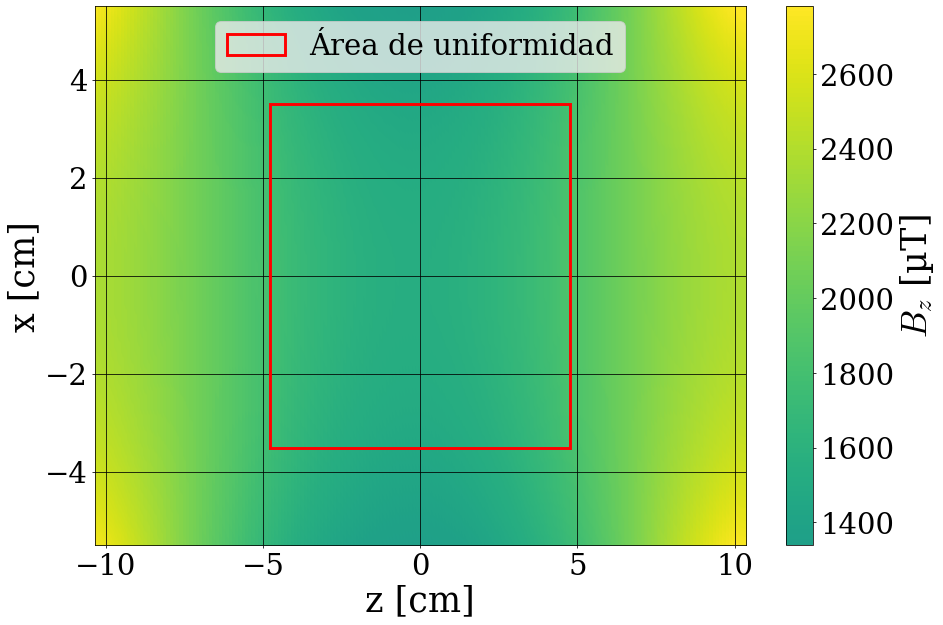

In [126]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

zs = np.linspace(-0.1035,0.1035,200)
xs = np.linspace(-.055,.055, 200)


grid = np.array([[(x, 0, z) for x in xs] for z in zs])
B = helmholtz_pair_dc.getB(grid)
norm = Normalize(B.max()*1e6,B.min()*1e6)

fig, ax1 = plt.subplots()
cmap = matplotlib.cm.viridis
colorscale = plt.cm.ScalarMappable(norm,cmap)
colors = colorscale.to_rgba
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax1, location='right', label="$B_z$ [µT]")

center = B[100,100,2]

for i in np.arange(grid.shape[0]):
    for j in np.arange(grid.shape[1]):
        ax1.plot(grid[i,j,2]*1e2, grid[i,j,0]*1e2 ,'o',ms=20, color = cmap(norm(B[i,j,2]*1e6)),zorder=0)

ax1.set_xlabel('z [cm]')
ax1.set_ylabel('x [cm]')
ax1.set_ylim((xs[0]*1e2,xs[-1]*1e2))
ax1.set_xlim((zs[0]*1e2,zs[-1]*1e2))

cbar.ax.set_ylim((B[:,:,2].min()*1e6,B[:,:,2].max()*1e6))

x1,y1 = (grid[100,13,0]*1e2,grid[100,36,0]*1e2)
x2 = grid[100,200-14,0]*1e2
y2 = grid[100,200-37,0]*1e2
uniform_area = Rectangle((x1,y1), width = x2-x1, height=y2-y1)
uniform_area.set_facecolor('None')
uniform_area.set_alpha(1)
uniform_area.set_edgecolor('r')
uniform_area.set_lw(3)
uniform_area.set_label('Área de uniformidad')
ax1.add_patch(uniform_area)
ax1.legend(loc='upper center')

In [130]:
B[100,100,2]*1e6

1545.3921913572606

In [124]:
pred_B_center = ((4/5)**(3/2)*4*np.pi*1e-7*800*2/((0.23/2)*1e-2))*1e6 #[T] -> [mT]
pred_B_center

1251027.8755801225

(0.3, 0.7)

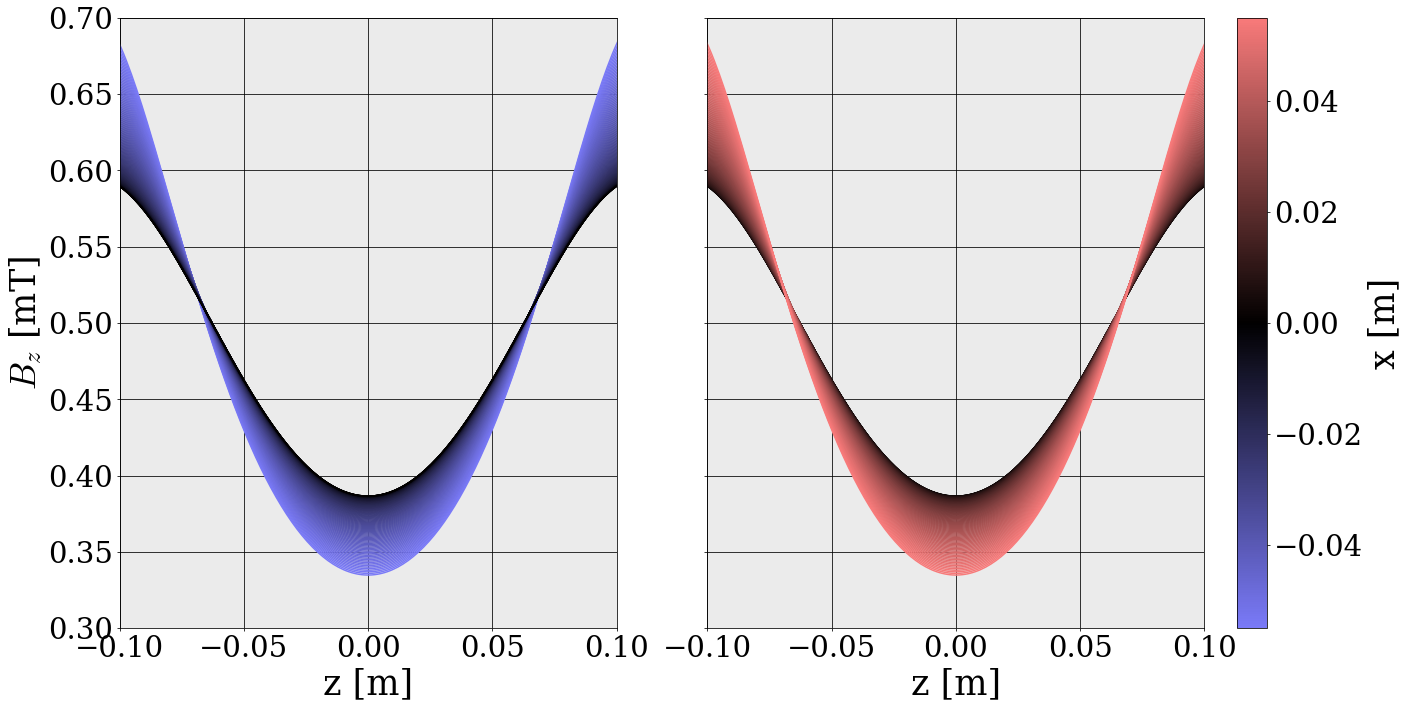

In [99]:
from matplotlib.colors import LinearSegmentedColormap

fig, (ax1,ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(20,10), layout='constrained')
norm = Normalize(min(xs),max(xs))
ax1.set_ylabel('$B_z$ [mT]')
ax1.set_xlabel('z [m]')
ax1.set_xlim(min(zs),max(zs))
basic_cols=['#7A7AF8', '#010000', '#F87A7A']
cmap=LinearSegmentedColormap.from_list('mycmap', basic_cols)
cbar = fig.colorbar(mappable=plt.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax2, location='right', pad=0)
cbar.ax.set_ylim(min(xs),max(xs))
cbar.ax.set_ylabel('x [m]')

ax2.set_xlabel('z [m]')
ax2.set_xlim(min(zs),max(zs))

for i,x in enumerate(xs):
    if i<=100:
        ax1.plot(grid[:,i,2], B[:,i,2]*1e3, c = cmap(norm(x)))
    else:
        ax2.plot(grid[:,i,2], B[:,i,2]*1e3, c = cmap(norm(x)))
    
ax1.set_xlim([-.1,.1])
ax2.set_xlim([-.1,.1])

ax1.set_ylim([0.3,0.7])
ax2.set_ylim([0.3,0.7])

In [ ]:
(grid[100,200-14,0]*1e2 - grid[100,13,0]*1e2)

0.0015603015075376925

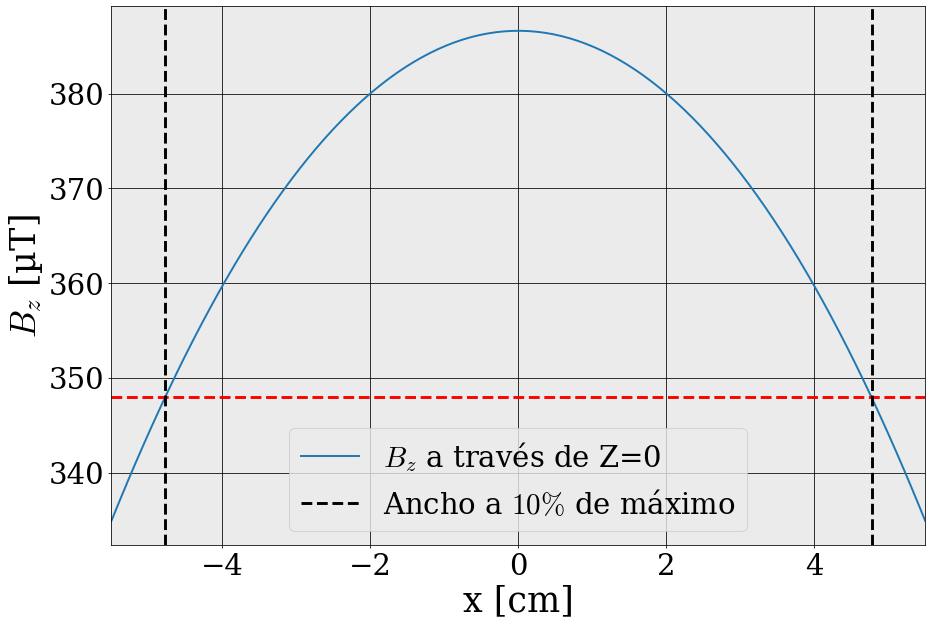

In [26]:
plt.plot(grid[100,:,0]*1e2, B[100,:,2]*1e6, lw=2, label='$B_z$ a través de Z=0')
plt.axhline(B[100,100,2]*1e6*0.9,color='r', ls='--', lw=3)
plt.axvline(grid[100,13,0]*1e2, color='k', ls='--', lw=3)
plt.axvline(grid[100,200-14,0]*1e2, color='k', ls='--', lw=3, label='Ancho a $10\%$ de máximo')
plt.xlabel('x [cm]')
plt.ylabel('$B_z$ [µT]')
plt.xlim([xs[0]*1e2,xs[-1]*1e2])
plt.legend()

In [ ]:
grid[100,200-37,0]*1e2 - grid[100,36,0]*1e2

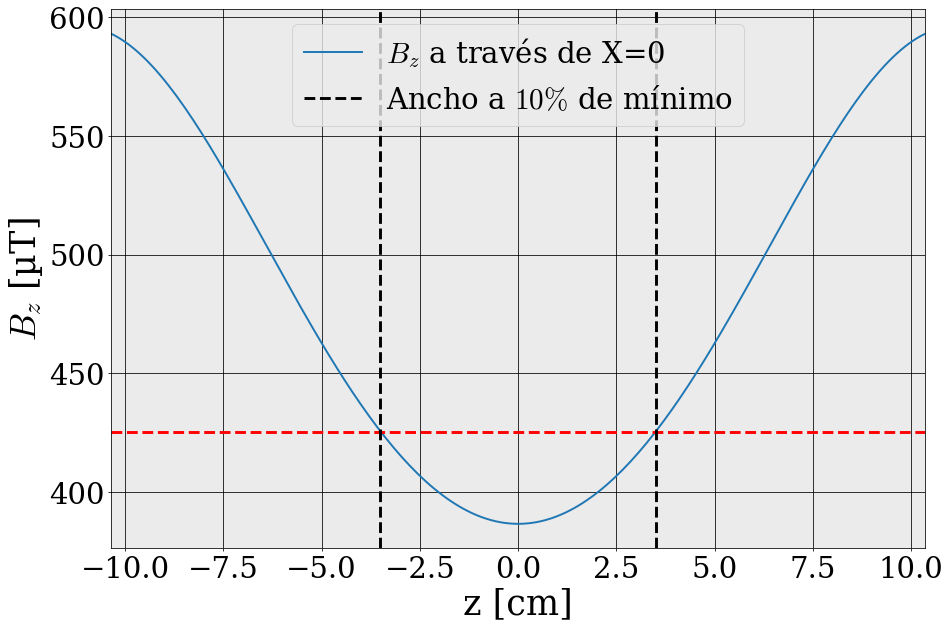

In [28]:
plt.plot(grid[:,100,2]*1e2, B[:,100,2]*1e6, lw=2, label='$B_z$ a través de X=0')
plt.axhline(B[100,100,2]*1e6*1.1,color='r', ls='--', lw=3)
plt.axvline(grid[100,36,0]*1e2, color='k', ls='--', lw=3)
plt.axvline(grid[100,200-37,0]*1e2, color='k', ls='--', lw=3, label='Ancho a $10\%$ de mínimo')
plt.xlabel('z [cm]')
plt.ylabel('$B_z$ [µT]')
plt.xlim([zs[0]*1e2,zs[-1]*1e2])
plt.legend()